<a href="https://colab.research.google.com/github/tassiogomes/Project_Insights/blob/main/insight_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INSIGHTS PROJECT

# Case Study

1 - Which houses should the House Rocket CEO buy and what is the purchase price?

2 - Once in a house owned by the company, when is the best time to sell and what is the selling price?

3 - Should House Rocket carry out a renovation to increase the sale price? What are the suggested changes?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Data

In [3]:
df = pd.read_csv('drive/My Drive/Insights_Project/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Knowing the data


In [11]:
print(df.columns)
print("\n------to_list()-------\n")
print(df.columns.to_list())

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

------to_list()-------

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [14]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Converting date objetc to datetime
df['date'] = pd.to_datetime(df['date'])
# Changing the data types
df['bathrooms'] = df['bathrooms'].astype('int64') # was in float
df['floors'] = df['floors'].astype('int64')

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Types
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [ ]:
# Simple statistcs
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
# Checking null values
df.isnull().sum(axis = 0) # axis = 0 count null values in each rows, 2 in each columns

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Sorting prices
df.sort_values(by = ['price', 'bedrooms'],
               ascending = [False , True]).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8,12050,27600,2,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,2014-06-11,7062500.0,5,4,10040,37325,2,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,2014-09-19,6885000.0,6,7,9890,31374,2,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,2014-08-04,5570000.0,5,5,9200,35069,2,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,2015-04-13,5350000.0,5,5,8000,23985,2,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,2015-04-13,5300000.0,6,6,7390,24829,2,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,2014-10-20,5110800.0,5,5,8010,45517,2,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,2014-06-17,4668000.0,5,6,9640,13068,1,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,2014-08-15,4500000.0,5,5,6640,40014,2,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,2014-06-18,4489000.0,4,3,6430,27517,2,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


## Detecting and Removing outliers

### price

In [ ]:
df['price'].value_counts()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


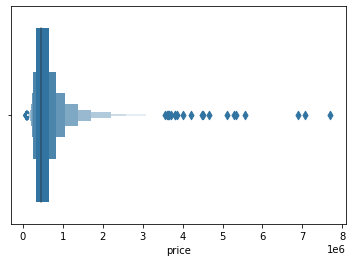

In [ ]:
sns.boxenplot(df['price'])
print (df['price'].describe())

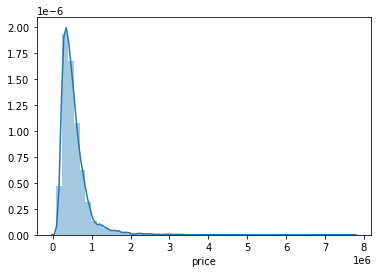

In [ ]:
sns.distplot(df['price'])

### bedroom

In [ ]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


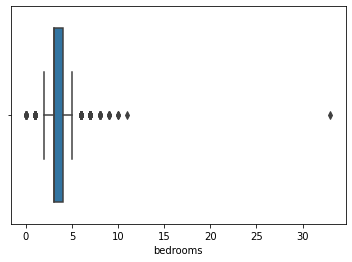

In [ ]:
sns.boxplot(df['bedrooms'])
print (df['bedrooms'].describe())

count    21613.000000
mean         1.749734
std          0.734873
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: bathrooms, dtype: float64


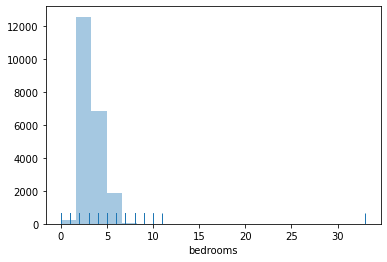

In [ ]:
sns.distplot(df['bedrooms'], bins = 20, kde=False, rug=True)

### bathrooms

In [ ]:
df['bathrooms'].value_counts()

2    10542
1     8355
3     2228
4      338
0       86
5       48
6       12
8        2
7        2
Name: bathrooms, dtype: int64

count    21613.000000
mean         1.749734
std          0.734873
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: bathrooms, dtype: float64


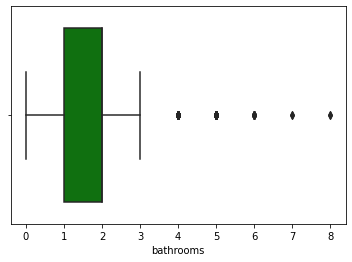

In [ ]:
sns.boxplot(df['bathrooms'], color = 'green')
print (df['bathrooms'].describe())

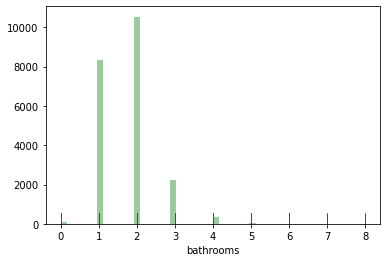

In [ ]:
sns.distplot(df['bathrooms'],  kde=False, rug=True, color = 'green')

### sqft_living

In [ ]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
3001      1
4970      1
2905      1
2793      1
1975      1
Name: sqft_living, Length: 1038, dtype: int64

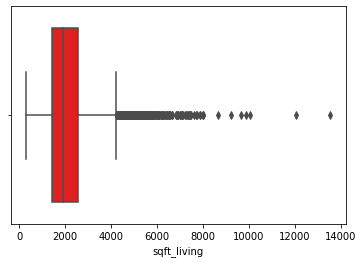

In [ ]:
sns.boxplot(df['sqft_living'], color = "red")

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


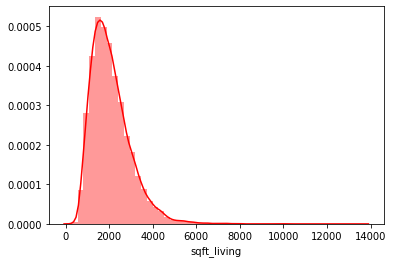

In [ ]:
sns.distplot(df['sqft_living'],color= "red")
print (df['sqft_living'].describe())

Text(0, 0.5, 'price')

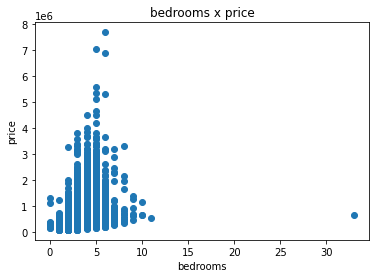

In [ ]:

x = df['bedrooms']
y = df['price']
plt.scatter(x, y)
plt.title("bedrooms x price")
plt.xlabel("bedrooms")
plt.ylabel("price")

Text(0, 0.5, 'price')

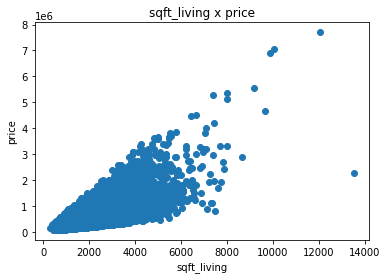

In [ ]:
x = df['sqft_living']
y = df['price']
plt.scatter(x, y)
plt.title("sqft_living x price")
plt.xlabel("sqft_living")
plt.ylabel("price")

In [ ]:
df_test = df[['bedrooms', 'bathrooms', 'condition','sqft_living', 'price']]
df_test

,bedrooms,bathrooms,condition,sqft_living,price
0,3,1,3,1180,221900.0
1,3,2,3,2570,538000.0
2,2,1,3,770,180000.0
3,4,3,5,1960,604000.0
4,3,2,3,1680,510000.0
...,...,...,...,...,...
21608,3,2,3,1530,360000.0
21609,4,2,3,2310,400000.0
21610,2,0,3,1020,402101.0
21611,3,2,3,1600,400000.0


In [ ]:
df_grp = df_test.groupby(['bedrooms', 'bathrooms', 'condition'], as_index = False).mean()
df_grp

,bedrooms,bathrooms,condition,sqft_living,price
0,0,0,1,290.000000,142000.0
1,0,0,3,2276.333333,604275.0
2,0,0,4,844.000000,139950.0
3,0,1,2,390.000000,228000.0
4,0,1,3,1430.000000,288000.0
...,...,...,...,...,...
137,10,2,4,3610.000000,650000.0
138,10,3,4,2920.000000,660000.0
139,10,5,3,4590.000000,1148000.0
140,11,3,3,3000.000000,520000.0


# Questions

##### 1. Quantas casas existem no dataset?
##### 2. Quantos atributos (colunas) tem?
##### 3. Quais são os atributos?
##### 4. Qual a casa mais cara?
##### 5. Qual a casa com maior número de quartos?
##### 6. Qual a soma total de quartos?
##### 7. Quantas casas possuem dois banheiros?
##### 8. Qual o preço médio das casa?
##### 9. Qual o preço médio das casas com dois banheiros?
##### 10. Qual o preço mínimo das casas com 3 quartos?
##### 11. Quantas casas possuem mais de 300m2
##### 12. Quantas casas tem mais de 2 andares?
##### 13. Quantas casas tem vista para o mar?
##### 14. Quantas casas tem vista para o mar e 3 quartos?
##### 15. Quantos banheiros tem as casas que tem mais de 300m2?

In [28]:
# 1. Quantas casas existem no dataset?
df.shape[0] # [rows, columns], positio 0 return row number

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64